A first run at using SVC in sci kit

In [1]:
#importing the libraries
import pandas as pd
import numpy as np
from sklearn import svm

import matplotlib.pyplot as plt
import seaborn as sns; sns.set(font_scale=1.2)

# Allows charts to appear in the notebook
%matplotlib inline

import pickle

In [4]:
players = pd.read_csv('CervelliMercer.csv')
players

,Name,Age,G,PA,AB,R,H,2B,3B,HR,...,OBP,SLG,OPS,OPS+,TB,GDP,HBP,SH,SF,IBB
0,Francisco Cervelli\cervefr01,29,130,510,451,56,133,17,5,7,...,0.370,0.401,0.771,113,181,12,8,4,1,1
1,Francisco Cervelli\cervefr01,30,101,393,326,42,86,14,1,1,...,0.377,0.322,0.699,91,105,14,6,0,5,1
2,Francisco Cervelli\cervefr01,31,81,304,265,31,66,13,2,5,...,0.342,0.370,0.712,90,98,7,6,0,1,0
3,Jordy Mercer\mercejo03,28,116,430,394,34,96,21,0,3,...,0.293,0.320,0.613,69,126,7,2,4,3,7
4,Jordy Mercer\mercejo03,29,149,584,519,66,133,22,3,11,...,0.328,0.374,0.701,88,194,11,5,7,2,8
5,Jordy Mercer\mercejo03,30,145,558,502,52,128,24,5,14,...,0.326,0.406,0.733,93,204,16,3,0,2,13


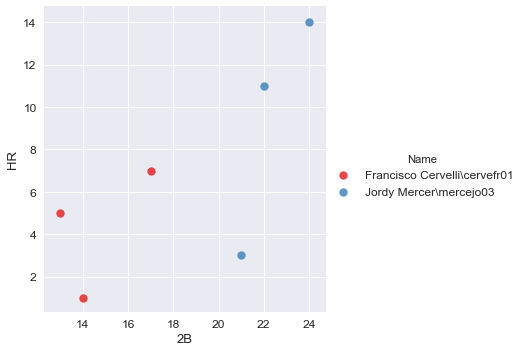

In [5]:
#doing a plot!
sns.lmplot('2B', 'HR', data=players, hue='Name',
           palette='Set1', fit_reg=False, scatter_kws={"s": 70});

In [6]:
# Specify inputs for the model
stats = players[['2B','HR']].as_matrix()
type_label = np.where(players['Name']=='Francisco Cervelli\cervefr01', 0, 1)

# Feature names
player_features = players.columns.values[1:].tolist()
player_features

['Age',
 'G',
 'PA',
 'AB',
 'R',
 'H',
 '2B',
 '3B',
 'HR',
 'RBI',
 'SB',
 'CS',
 'BB',
 'SO',
 'BA',
 'OBP',
 'SLG',
 'OPS',
 'OPS+',
 'TB',
 'GDP',
 'HBP',
 'SH',
 'SF',
 'IBB']

In [7]:
# Fit the SVM model
model = svm.SVC(kernel='linear')
model.fit(stats, type_label)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [8]:
# Get the separating hyperplane
w = model.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(0, 30)
yy = a * xx - (model.intercept_[0]) / w[1]

# Plot the parallels to the separating hyperplane that pass through the support vectors
b = model.support_vectors_[0]
yy_down = a * xx + (b[1] - a * b[0])
b = model.support_vectors_[-1]
yy_up = a * xx + (b[1] - a * b[0])

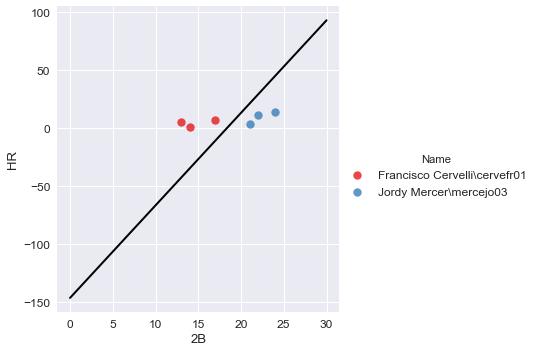

In [9]:
# Plot the hyperplane
sns.lmplot('2B', 'HR', data=players, hue='Name', palette='Set1', fit_reg=False, scatter_kws={"s": 70})
plt.plot(xx, yy, linewidth=2, color='black');

In [10]:
# Create a function to guess whether a season comes from Cervelli or Mercer
def franc_or_jord(twoBase, homeRun):
    if(model.predict([[twoBase, homeRun]]))==0:
        print('Francisco in the disco!')
    else:
        print('Oh lordy it must be Jordy')

In [11]:
franc_or_jord(29,6)

Oh lordy it must be Jordy


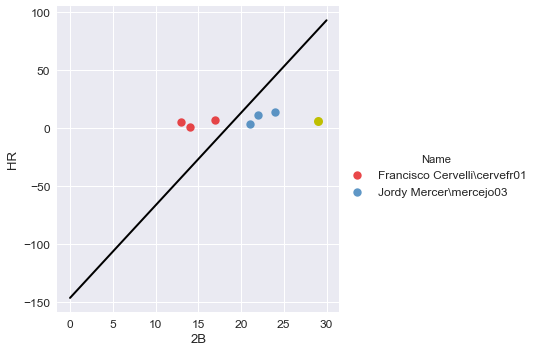

In [12]:
# Plot the point to visually see where the point lies
sns.lmplot('2B', 'HR', data=players, hue='Name', palette='Set1', fit_reg=False, scatter_kws={"s": 70})
plt.plot(xx, yy, linewidth=2, color='black')
plt.plot(29, 6, 'yo', markersize='9');

In [13]:
franc_or_jord(15,12)

Francisco in the disco!


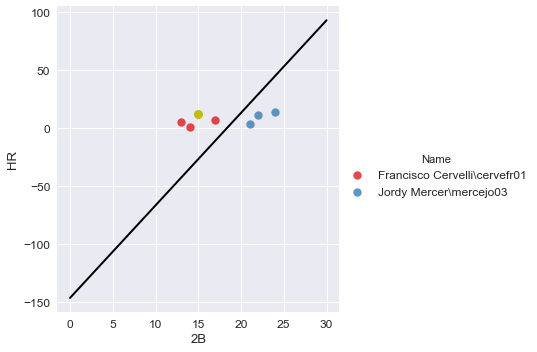

In [14]:
# Plot the point to visually see where the point lies
sns.lmplot('2B', 'HR', data=players, hue='Name', palette='Set1', fit_reg=False, scatter_kws={"s": 70})
plt.plot(xx, yy, linewidth=2, color='black')
plt.plot(15, 12, 'yo', markersize='9');